In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\GSS2018.csv')
# Columns of interest based on the codebook and project requirements
columns_of_interest = ['RELIG', 'CHILDS', 'AGEKDBRN', 'EDUC', 'HAPPY', 'ATTEND', 'GOD', 'INCOME16', 'FAMGEN', 'AGE', 'SEX', 'RACE', 'MARITAL', 'POLVIEWS']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]


In [3]:
# Read JSON file containing column descriptions
with open('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\GSS_Codebook_index.json', 'r') as f:
    column_descriptions = json.load(f)

# Only keep descriptions for columns we are interested in
column_descriptions = {k: column_descriptions[k] for k in columns_of_interest if k in column_descriptions}



In [4]:
# Convert 'INCOME' to numeric
df_selected.loc[:, 'INCOME16'] = pd.to_numeric(df_selected['INCOME16'], errors='coerce')

# Cap 'AGE' at 100
df_selected.loc[:, 'AGE'] = df_selected['AGE'].apply(lambda x: min(x, 100))

# Drop rows with more than 3 missing values
df_cleaned = df_selected.dropna(thresh=len(df_selected.columns) - 3)


In [5]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Count of non-null values in each column
non_null_count = df_cleaned.count()
print("Count of non-null values for each column: \n", non_null_count)

Count of non-null values for each column: 
 RELIG       2320
CHILDS      2319
AGEKDBRN    1658
EDUC        2318
HAPPY       2318
ATTEND      2311
GOD         2301
INCOME16    2148
FAMGEN      2320
RELIG16     2310
RELITEN     2298
DEGREE      2320
AGE         2315
SEX         2320
RACE        2320
MARITAL     2319
POLVIEWS    2238
HRS1        1375
dtype: int64


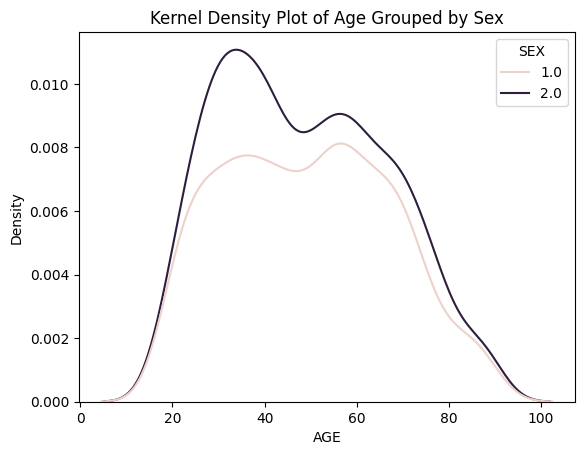

Summary Statistics: 
             CHILDS     AGEKDBRN         EDUC        HAPPY          GOD  \
count  2319.000000  1658.000000  2318.000000  2318.000000  2301.000000   
mean      1.863303    24.285887    13.745470     1.843399     4.863972   
std       1.674772     5.720111     2.964167     0.645744     1.555415   
min       0.000000    12.000000     0.000000     1.000000     1.000000   
25%       0.000000    20.000000    12.000000     1.000000     4.000000   
50%       2.000000    23.000000    14.000000     2.000000     6.000000   
75%       3.000000    28.000000    16.000000     2.000000     6.000000   
max       8.000000    51.000000    20.000000     3.000000     6.000000   

          INCOME16       FAMGEN          AGE          SEX         RACE  \
count  2148.000000  2320.000000  2315.000000  2320.000000  2320.000000   
mean     17.743017     1.525000    48.907127     1.551293     1.386207   
std       5.925093     0.931586    17.995450     0.497469     0.679890   
min       1.000

In [6]:
# Kernel Density Plot of 'AGE' by 'SEX'
sns.kdeplot(data=df_cleaned, x='AGE', hue='SEX')
plt.title('Kernel Density Plot of Age Grouped by Sex')
plt.show()

# Summary Statistics
summary_stats = df_cleaned.describe()
print("Summary Statistics: \n", summary_stats)


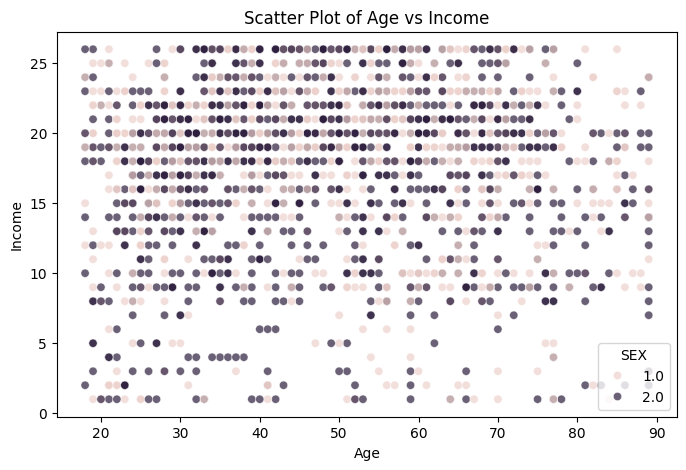

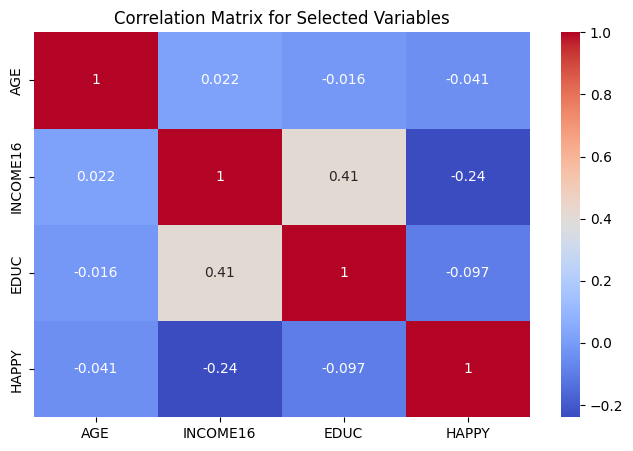

In [7]:
import numpy as np
df_cleaned.loc[:, 'INCOME16'].replace(np.nan, 'N/A', inplace=True)

# Filter out rows where 'INCOME16' is 'N/A'
df_to_plot = df_cleaned[df_cleaned['INCOME16'] != 'N/A']

# Scatter plot of 'AGE' vs 'INCOME16', differentiated by 'SEX'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_to_plot, x='AGE', y='INCOME16', hue='SEX', alpha=0.7)  # Note the change here
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Selecting a subset of variables for the correlation matrix
selected_vars = ['AGE', 'INCOME16', 'EDUC', 'HAPPY']
correlation_matrix_subset = df_to_plot[selected_vars].astype(float).corr()  # Also note the change here

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()

Correlation Matrix for Selected Variables
The heatmap below shows the correlation matrix for selected variables: 'AGE', 'INCOME', 'EDUC', and 'HAPPY'.

AGE: The age of the respondent.
INCOME: The income category to which the respondent belongs.
EDUC: The highest educational degree obtained by the respondent.
HAPPY: The general happiness level of the respondent.
Interpretation:

Positive numbers indicate a positive correlation: as one variable increases, the other variable tends to also increase.
Negative numbers indicate a negative correlation: as one variable increases, the other variable tends to decrease.
Values close to 1 or -1 indicate a strong correlation, while values close to 0 indicate weak or no correlation.


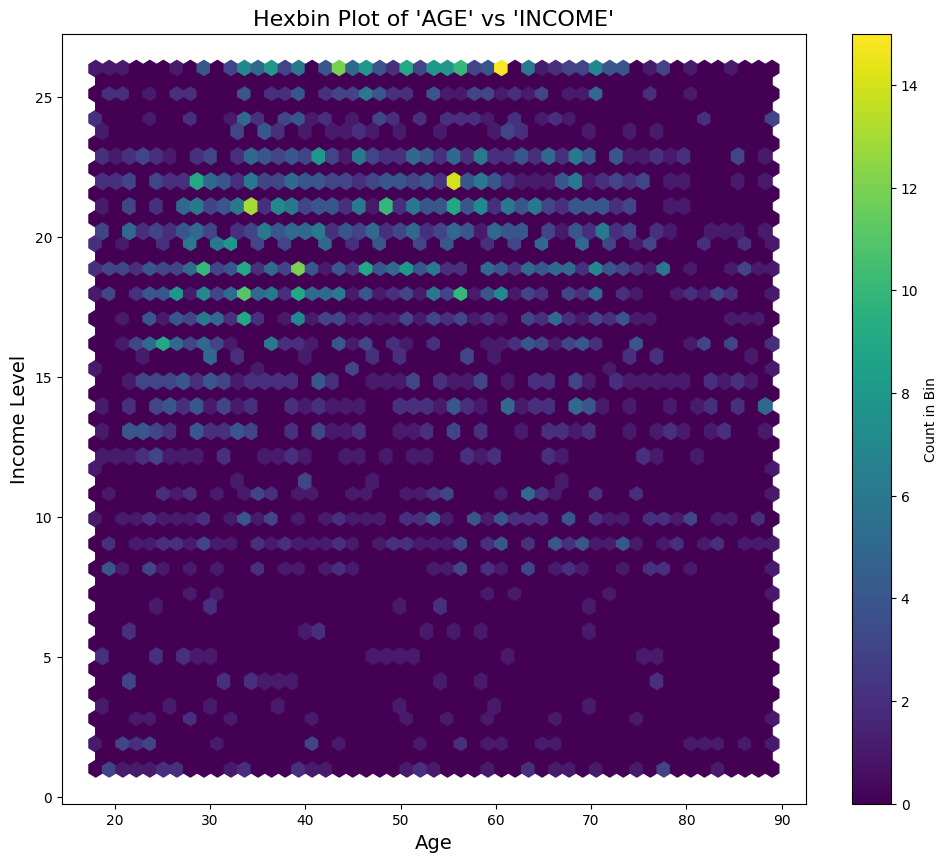

In [8]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Create the hexbin plot
plt.figure(figsize=(12, 10))
plt.hexbin(x=df_cleaned['AGE'], y=df_cleaned['INCOME16'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title("Hexbin Plot of 'AGE' vs 'INCOME'", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Income Level", fontsize=14)

# Show the plot
plt.show()


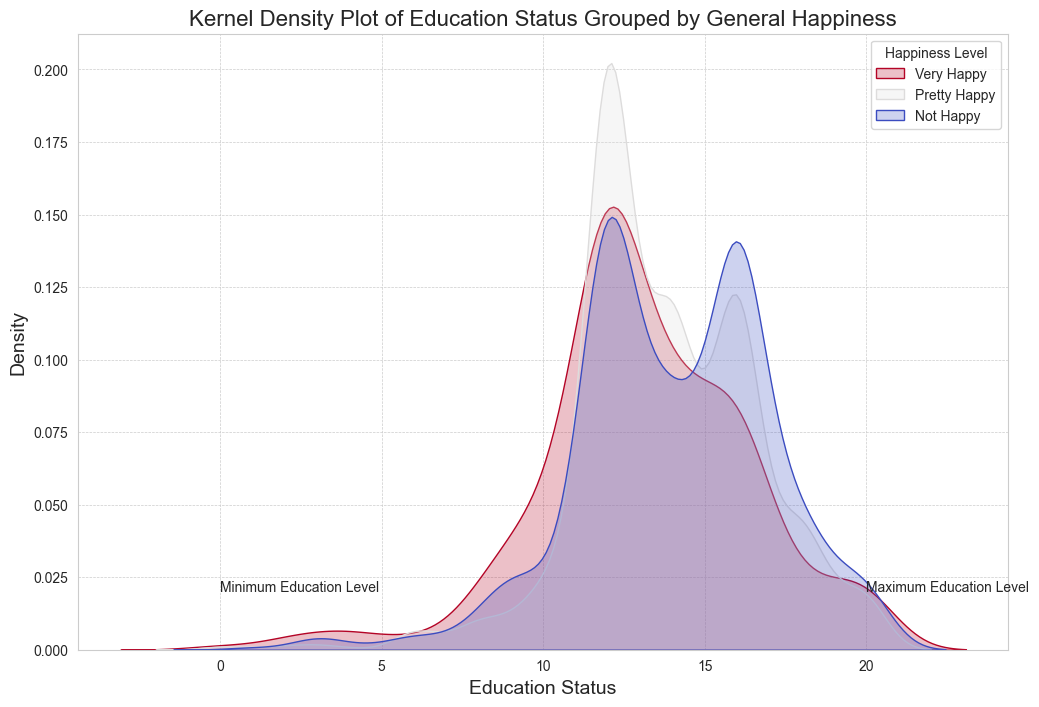

In [9]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Configure plot aesthetics
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Create the grouped Kernel Density Plot with fill and custom palette
sns.kdeplot(data=df_cleaned, x='EDUC', hue='HAPPY', common_norm=False, fill=True, palette="coolwarm")

# Adding Annotations for minimum and maximum education levels
min_val = df_cleaned['EDUC'].min()
max_val = df_cleaned['EDUC'].max()
plt.text(min_val, 0.02, 'Minimum Education Level', rotation=0)
plt.text(max_val, 0.02, 'Maximum Education Level', rotation=0)

# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding Labels and Titles
plt.title('Kernel Density Plot of Education Status Grouped by General Happiness', fontsize=16)
plt.xlabel('Education Status', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
plt.legend(title='Happiness Level', labels=['Very Happy', 'Pretty Happy', 'Not Happy'])

# Show the plot
plt.show()


C:\Users\qaism\AppData\Local\Temp\ipykernel_32936\4259533746.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_cleaned, x='EDUC', hue='RELIG', common_norm=False, fill=True, linewidth=2, palette="tab10", alpha=0.5)


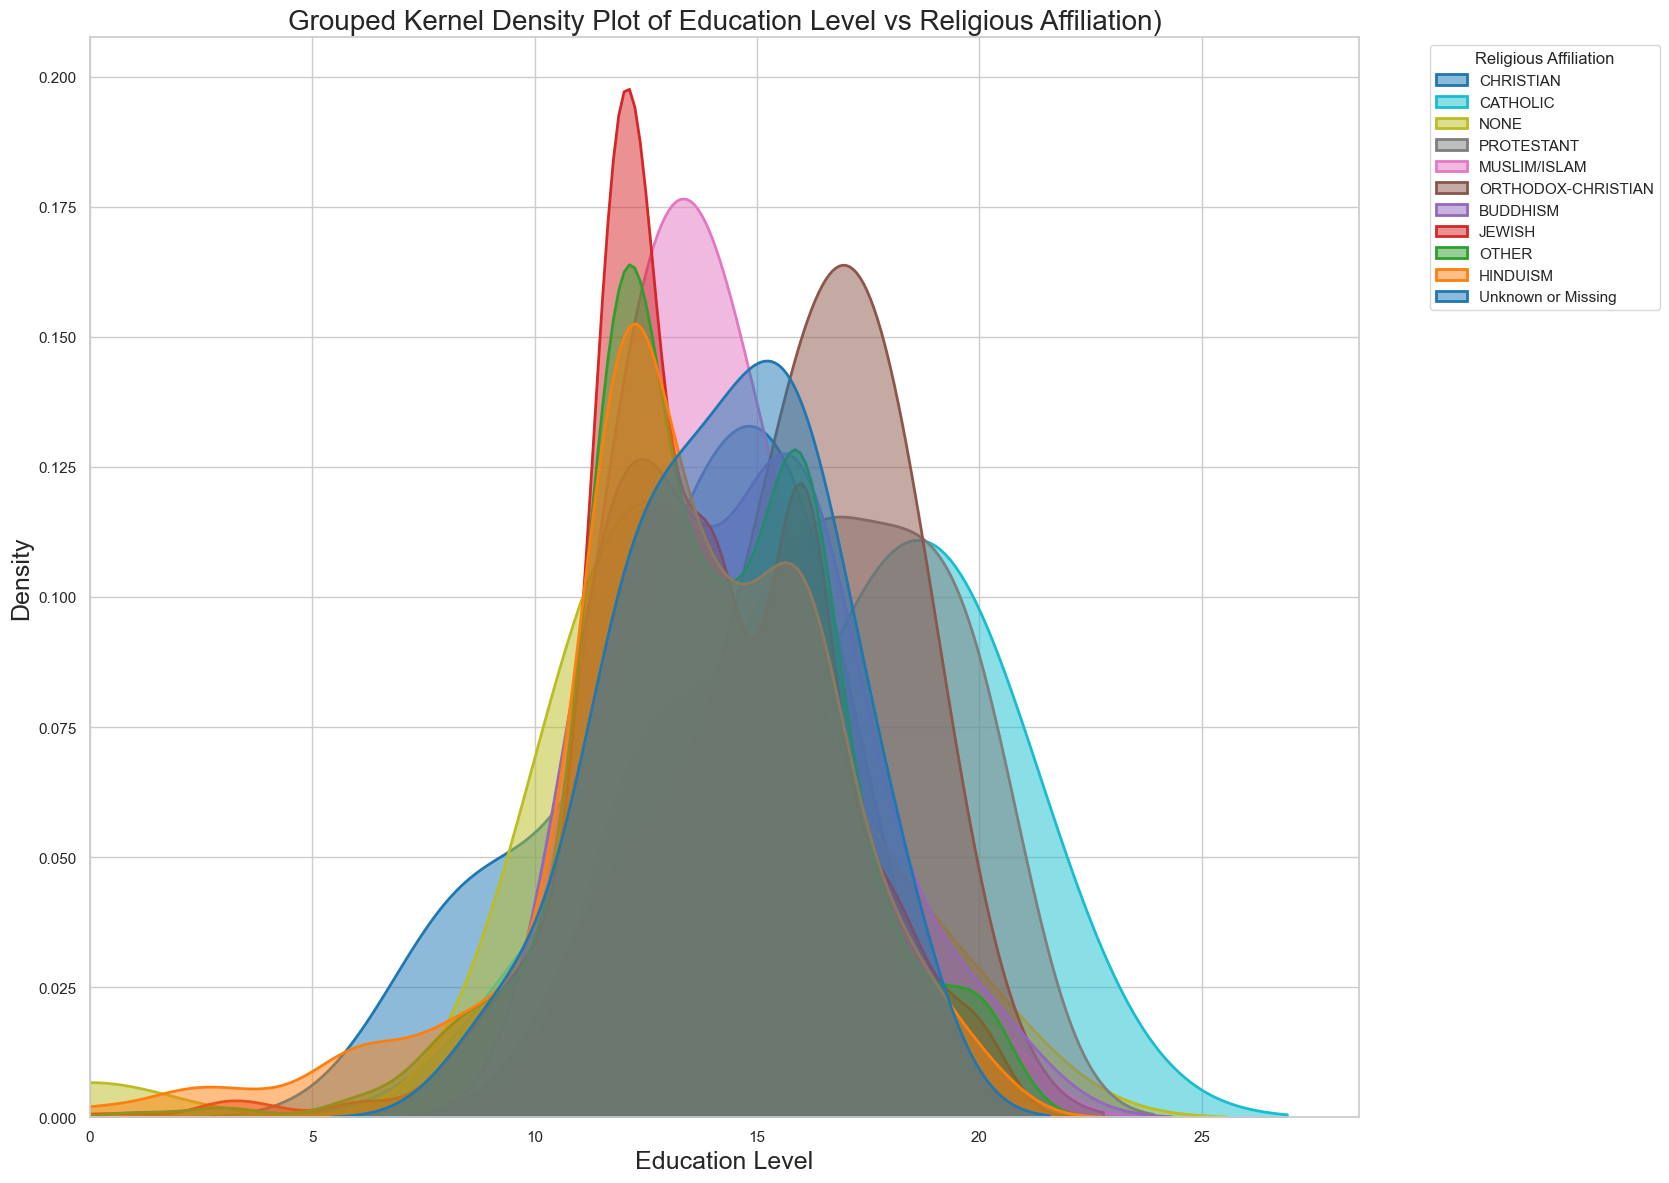

In [10]:
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(20, 12))

# Create a Grouped Kernel Density Plot of Education Level vs Religious Affiliation
# Adding transparency with alpha
sns.kdeplot(data=df_cleaned, x='EDUC', hue='RELIG', common_norm=False, fill=True, linewidth=2, palette="tab10", alpha=0.5)

# Add title and labels with increased font size
# Adding more context to the title
plt.title('Grouped Kernel Density Plot of Education Level vs Religious Affiliation', fontsize=20)
plt.xlabel('Education Level', fontsize=18)
plt.ylabel('Density', fontsize=18)

# Limit x-axis to non-negative range
plt.xlim(left=0)

# Move the legend outside of the plot
# Updating "NAN" to "Unknown or Missing"
legend_labels = [t.get_text().replace("NAN", "Unknown or Missing") for t in plt.gca().get_legend().texts]
plt.legend(title='Religious Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout(rect=[0,0,0.85,1])  # This ensures the legend doesn't get cut off
plt.show()

In [11]:
df_selected.to_csv(r'C:\Users\qaism\OneDrive - University of Virginia\Documents\GitHub\group14\filtered_dataset.csv', index=False)

df_cleaned.to_csv(r'C:\Users\qaism\OneDrive - University of Virginia\Documents\GitHub\group14\cleaned_dataset.csv', index=False)

